In [1]:
using LensFactory
using LensFactory.Constants
using CairoMakie

## 2-plane 2 point masses (2p-2p case)

In [2]:
# Initialize default cosmology
cosmo = Cosmology.init_cosmology()

# Lens and source redshifts
zl = [0.4, 0.5]
zs = 1.5

# ADDs and distance ratio
Dl1 = Cosmology.angular_diameter_distance(cosmo, 0., zl[1])
Dl2 = Cosmology.angular_diameter_distance(cosmo, 0., zl[2])

Dls1 = Cosmology.angular_diameter_distance(cosmo, zl[1], zs)
Dls2 = Cosmology.angular_diameter_distance(cosmo, zl[2], zs)

Dos = Cosmology.angular_diameter_distance(cosmo, 0., zs);

# Create image plane grid
x, y = Lenses.get_meshgrid(10*ANGLE_ARCSEC, 10*ANGLE_ARCSEC, 0.01*ANGLE_ARCSEC);

1.5387852102401427 1.3543948943779598


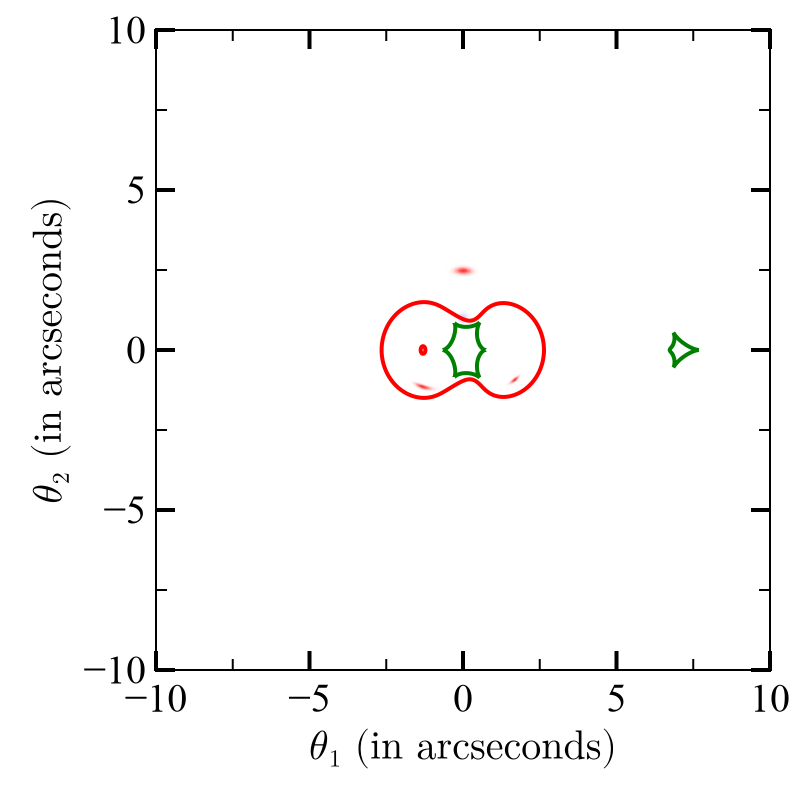

CairoMakie.Screen{IMAGE}


In [3]:
multi_lens = [(lens=:PointLens, z_d=zl[1], D_d=Dl1, x_c= -1.0*ANGLE_ARCSEC, y_c= 0*ANGLE_ARCSEC, mass=5E11*MASS_SUN),
              (lens=:PointLens, z_d=zl[2], D_d=Dl2, x_c= +1.0*ANGLE_ARCSEC, y_c= 0*ANGLE_ARCSEC, mass=5E11*MASS_SUN)]
lens = Lenses.init_MultiPlaneLens(multi_lens)

theta_E1 = Lenses.PointLens.einstein_angle(D_d=Dl1, D_ds=Dls1, D_s=Dos, mass=5E11*MASS_SUN)
theta_E2 = Lenses.PointLens.einstein_angle(D_d=Dl2, D_ds=Dls2, D_s=Dos, mass=5E11*MASS_SUN)
println(theta_E1/ANGLE_ARCSEC," ", theta_E2/ANGLE_ARCSEC)

src = Sources.gaussian(x, y, 0.1*ANGLE_ARCSEC, 0.1*ANGLE_ARCSEC, (0.0*ANGLE_ARCSEC, 1.0*ANGLE_ARCSEC), A=ANGLE_ARCSEC^2)
fig, ax = MultiPlane.plot_image_plane(cosmo, lens, x, y, zs; source=src)
display(fig)

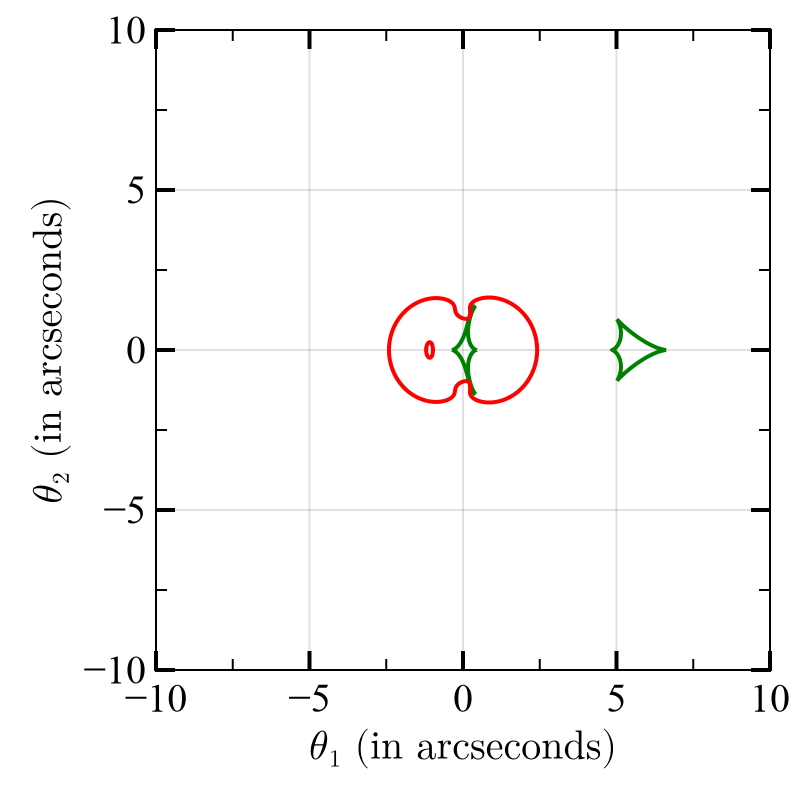

CairoMakie.Screen{IMAGE}


In [4]:
multi_lens = [(lens=:PointLens, z_d=zl[1], D_d=Dl1, x_c= -0.7*ANGLE_ARCSEC, y_c= 0*ANGLE_ARCSEC, mass=5E11*MASS_SUN),
              (lens=:PointLens, z_d=zl[2], D_d=Dl2, x_c= +0.7*ANGLE_ARCSEC, y_c= 0*ANGLE_ARCSEC, mass=5E11*MASS_SUN)]
lens = Lenses.init_MultiPlaneLens(multi_lens)

fig, ax = MultiPlane.plot_image_plane(cosmo, lens, x, y, zs)
display(fig)

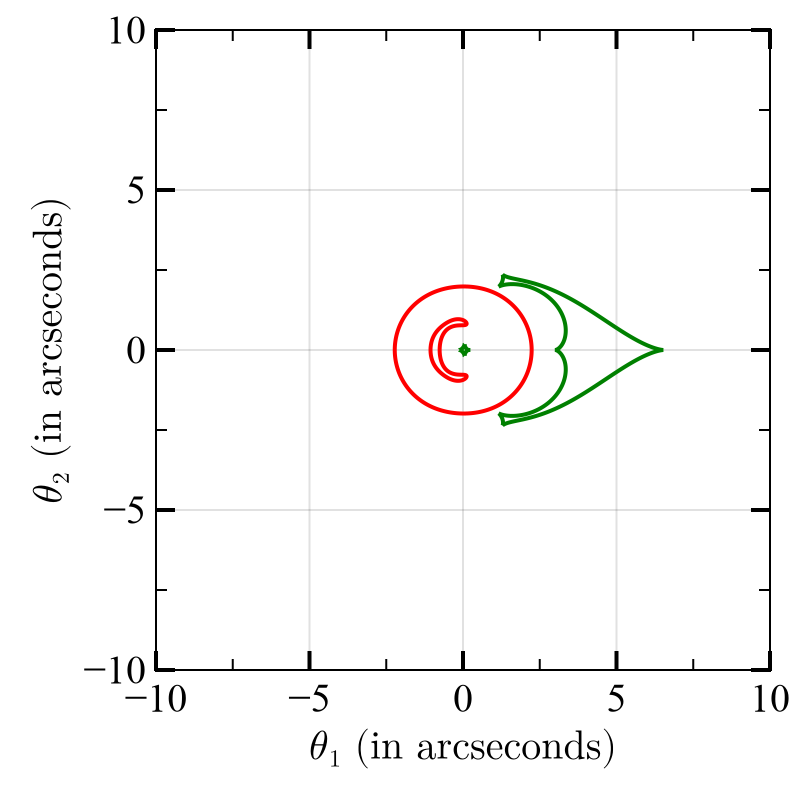

CairoMakie.Screen{IMAGE}


In [5]:
multi_lens = [(lens=:PointLens, z_d=zl[1], D_d=Dl1, x_c= -0.4*ANGLE_ARCSEC, y_c= 0*ANGLE_ARCSEC, mass=5E11*MASS_SUN),
              (lens=:PointLens, z_d=zl[2], D_d=Dl2, x_c= +0.4*ANGLE_ARCSEC, y_c= 0*ANGLE_ARCSEC, mass=5E11*MASS_SUN)]
lens = Lenses.init_MultiPlaneLens(multi_lens)

fig, ax = MultiPlane.plot_image_plane(cosmo, lens, x, y, zs)
display(fig)